In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'C:\Users\Work\Desktop\Python Lessons\Data Science\Data Science w Py Course\Data For Use\medical_examination.csv')

<hr/>

### Contents

* #### [Assignment](#assignment)
    * #### [Data Description](#section1)
    * #### [Tasks](#section2)
* #### [1.Gaining Insights](#insights)
    * #### [Insight Summary](#sum_insight)
* #### [2.My Thought Process](#thought_process)
* #### [3.Pseudocode](#pseudocode)
* #### [4.Solutions](#solutions)

<hr/>

### Assignment <a class='anchor' id='assignment'></a>

In this project, I will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

#### Data description

The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. I will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

#### Tasks

Create a chart similar to `examples/Figure_1.png`, where we show the counts of good and bad outcomes for the `cholesterol`, `gluc`, `alco`, `active`, and `smoke` variables for patients with cardio=1 and cardio=0 in different panels.

<ins>`Figure_1.png`:</ins>

| Feature | Variable Type | Variable      | Value Type |
|:-------:|:------------:|:-------------:|:----------:|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


Use the data to complete the following tasks in `medical_data_visualizer.py`:
* Add an `overweight` column to the data. 
    - To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. 
        - If that value is > 25 then the person is overweight. 
        - Use the value 0 for NOT overweight and the value 1 for overweight.
* Normalize the data by making 0 always good and 1 always bad. 
    - If the value of `cholesterol` or `gluc` is 1, make the value 0. 
    - If the value is more than 1, make the value 1.
* Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's `catplot()`. 
    - The dataset should be split by 'Cardio' so there is one chart for each `cardio` value. 
    - The chart should look like `examples/Figure_1.png`.
* Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
  - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
  - height is more than the 97.5th percentile
  - weight is less than the 2.5th percentile
  - weight is more than the 97.5th percentile
* Create a correlation matrix using the dataset. 
    - Plot the correlation matrix using seaborn's `heatmap()`. 
    - Mask the upper triangle. 
    - The chart should look like `examples/Figure_2.png`.

Any time a variable is set to `None`, make sure to set it to the correct code.

<hr/>

<a class='anchor' id='thought_process'></a>
<h3>My Thought Process</h3>

<b>1. Perform a quick EDA</b>

    * Check for statistical significance, formatting, nulls, and outliers.
    * Create 'df.overweight' column & apply lambda calculaton
    * Normalize 'gluc' and 'smoke' columns with bin.representation
    * Convert data into long format with counts using sns.catplot (kind: 'count')

<b>2. Clean The Data</b>
    
    * CODE:
    hMap = df[
    (df.ap_lo <= df.ap_hi)
    & (df.height >= df.height.quantile(0.025))
    & (df.height <= df.height.quantile(0.975))
    & (df.weight >= df.weight.quantile(0.025))
    & (df.weight <= df.weight.quantile(0.025))
    ]

<b>3. Analyze Relationships</b>

    * Create corelation matrix
    * Plot boxmap
    * Plot heatmap

<hr/>

<a class='anchor' id='insights'></a>
<h2>Gaining Insight From DataFrame</h2>

In [46]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [47]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [49]:
print(f'ROWS: {df.shape[0]}, COLS: {df.shape[1]}')

ROWS: 70000, COLS: 13


In [50]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<a class='anchor' id='sum_insight'></a>
<h4>Insight Summary</h4>

- <b> Gender</b> has binary representation
- <b> Index</b> is mismatched with 'id' col. 
- <b> Height</b> looks to be in 'cm' measurements
- <b> Weight</b> looks to be in 'kg' measurements
- <b> Age</b> values look to be encoded? May need to clean that up. 
- <b> Ap_hi</b> may need to be cleaned up. -150.00 impossible as is 16020.00.
- <b> Ap_lo</b> may need tobe cleaned up. -70.00 is impossible as is 11,000.00.


<hr/>

<hr/>
<a class='anchor' id='solutions'></a>
<h3>Solutions</h3>

<h4>Add 'overweight' column</h4>

- To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters.
    - If that value is > 25 then the person is overweight.
    - Use the value 0 for NOT overweight and the value 1 for overweight.

In [63]:
#Create overweight column that populates based on individaul row calculations of:
## apply function: (Current weight/(h:->(m**2)) > 25: '1' else '0'

df['overweight'] = (df['weight'] / (df['height']/100)**2).apply(lambda hBp: 1 if hBp > 25 else 0)

df.head(0)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight


<hr/>

<h4>Normalize data by making '0' always good and '1' always bad.</h4>

- If the value of 'cholesterol' or 'gluc' is 1, make the value '0'.
- If the value is more than '1', make the value '1'. 

In [53]:
#Original Values:

df[['cholesterol', 'gluc']].head()


,cholesterol,gluc
0,1,1
1,3,1
2,3,1
3,1,1
4,1,1


In [67]:
#Create & apply func to change 'chol' vals to '0'min and '1'max
df['cholesterol'] = df['cholesterol'].apply(lambda nml: 0 if nml == 1 else 1)

#Create & apply func to change 'gluc' vals to '0'min and '1'max
df['gluc'] = df['gluc'].apply(lambda nml: 0 if nml == 1 else 1)

In [68]:
#Updated 'chol' and 'gluc' columns: 
df[['cholesterol','gluc']].head()

,cholesterol,gluc
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0


<hr/>

<h4>Draw Categorical Plot</h4>

- Create DataFrame for cat_plot using 'pd.melt' using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'

In [78]:
def draw_cat_plot():
    df_cat = pd.melt(
                     df, 
                     id_vars='cardio', 
                     var_name = 'variable',
                     value_vars = ['alco','active','cholesterol','gluc','overweight','smoke']
                    )              

<h4>Group and reformat the data to split it by 'cardio'</h4>

- Show the counts of each feature. 
- Rename one of the columns for the catplot to work correctly. 

In [79]:
df_cat = pd.melt(df,
                 var_name='variable', 
                 value_vars = ['active','alco','cholesterol','gluc','overweight','smoke'],
                 id_vars = 'cardio'
                )

<h4> Draw the catplot with 'sns.catplot()'

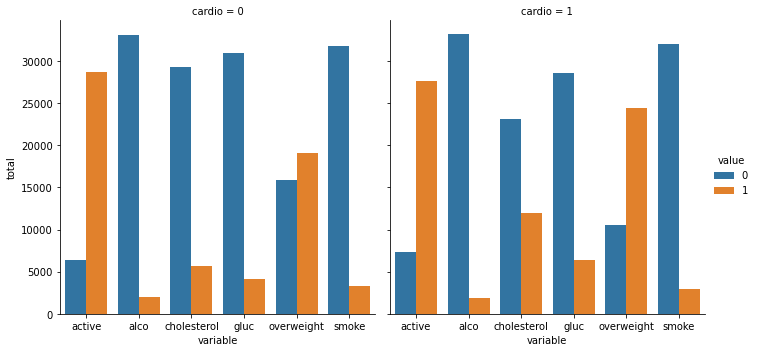

In [80]:
#Create our two different cardio values:
fig = sns.catplot(
        data=df_cat, kind='count', x='variable',hue='value',col='cardio'
        ).set_axis_labels('variable','total')
fig = fig.fig

The results of this plot show a dramatic relationship between heart disease and cholesterol, obesity, and smoking.

More specifically, values of '1' for 'overweight' show a drastic spike in correlative cardiovascular problems for those with known histories of cardiovascular issues. The risk of heart diseases from smoking remains high regardless of history.  

<h4>Draw Heat Map</h4>

- Clean the data
- Calculate the correlation matrix
- Generate a mask for the upper triangle
- Setup the matplotlib figure
- Draw the heatmap with 'sns.heatmap()'

In [85]:
def draw_heat_map():
    #Clean the data
    hMap = df[(df.ap_lo <= df.ap_hi)
    & (df.height >= df.height.quantile(0.025))
    & (df.height <= df.height.quantile(0.975))
    & (df.weight >= df.weight.quantile(0.025))
    & (df.weight <= df.weight.quantile(0.975))
    ]
    
    #Calculate the correlation matrix
    corr = hMap.corr()
    
    #Generate a mask for the upper triangle
    mask = np.triu(corr)
    
    #Setup the matplotlib figure
    fig, ax = plt.subplots(figsize=(12,7))
    
    #Draw the heatmap with 'sns.heatmap()''
    sns.heatmap(corr,mask=mask,
                fmt='.1f',
                vmax=.3, 
                linewidths=.5, 
                square=True,
                cbar_kws = {'shrink':0.5}, 
                annot=True, 
                center=0)

<hr/>

<h2>Heatmap Correlation Matrix</h2>

This map represents the correlated diseases amongst varying physical traits. 

Notably, there is a high correlation between:

* weight and heart diseases (0.2)
* weight and being overweight (0.7)
* heart diseases associated with high cholesterol and overweight (0.1 & 0.2)

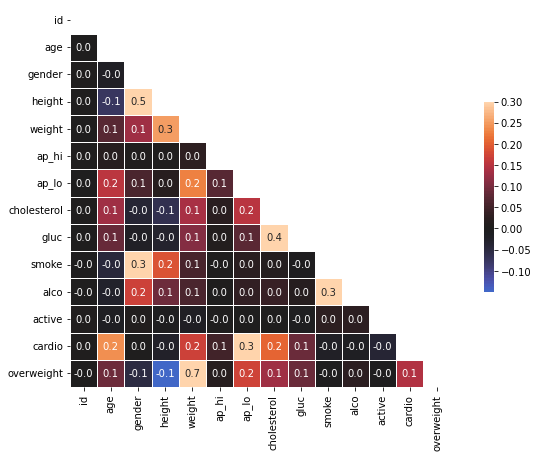

In [86]:
draw_heat_map()